[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/matog/Flacso_ciencia_de_datos_python_2022/blob/main/Clase3/3%20-%20Netflix_EDA.ipynb)


Fuente: [Kaggle](https://www.kaggle.com/code/andreshg/eda-beginner-to-expert-plotly/data)

In [ ]:
!pip install sklearn

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns
# from pandas_profiling import ProfileReport

![netflix.jpg](img/netflix.jpeg)

In [2]:
df = pd.read_csv('https://github.com/matog/Flacso_ciencia_de_datos_python_2022/raw/main/Clase3/data/netflix_titles.csv')

In [3]:
df.sample(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2838,s2839,Movie,How the Beatles Changed the World,Tom O'Dell,"George Harrison, John Lennon, Ringo Starr, Pau...","United States, United Kingdom","February 1, 2018",2017,TV-PG,110 min,"Documentaries, Music & Musicals",Interviews and rare archival footage illuminat...
4349,s4350,TV Show,My Runway,NaN,"Ji-yeon Park, Dong-ho Kang, Chul-woong Kang, B...",South Korea,"December 30, 2016",2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",An egotistic top male model and a pretty model...
7574,s7575,Movie,What's Your Raashee?,Ashutosh Gowariker,"Harman Baweja, Priyanka Chopra, Manju Singh, A...",India,"August 15, 2020",2009,TV-PG,203 min,"Comedies, International Movies, Music & Musicals","To protect his family from ruin, Yogesh must m..."
1497,s1498,Movie,Cool Hand Luke,Stuart Rosenberg,"Paul Newman, George Kennedy, J.D. Cannon, Lou ...",United States,"January 1, 2021",1967,TV-14,127 min,"Classic Movies, Dramas","Luke Jackson likes to do things his own way, w..."
1490,s1491,TV Show,Control Z,NaN,"Ana Valeria Becerril, Michael Ronda, Yankel St...",Mexico,"May 22, 2020",2020,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",When a hacker begins releasing students' secre...
1057,s1058,Movie,Born Strong,"Gary Cohen, Ross Hockrow","Eddie Hall, Hafþór Júlíus Björnsson, Brian Sha...",United States,"December 31, 2017",2017,TV-MA,86 min,"Documentaries, Sports Movies",Four 400-pound giants fight for the crown at t...
1678,s1679,Movie,Dedh Ishqiya,Abhishek Chaubey,"Naseeruddin Shah, Madhuri Dixit, Arshad Warsi,...",India,"September 28, 2020",2014,TV-14,146 min,"Comedies, Dramas, International Movies",After failing to win the heart of an aristocra...
2915,s2916,Movie,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a..."
3997,s3998,Movie,May You Prosper,"Hassan Hegazy, Shady Ali","Ahmed Rizk, Bosy, Bayoumi Fouad, Mahmoud Ellit...",Egypt,"July 20, 2019",2017,TV-14,93 min,"Comedies, International Movies, Music & Musicals",A man's inability to conquer his personal inse...
652,s653,Movie,B.A. Pass,Ajay Bahl,"Shadab Kamal, Shilpa Shukla, Rajesh Sharma, Di...",India,"June 7, 2018",2013,TV-14,99 min,"Dramas, Independent Movies, International Movies","Orphaned and at loose ends, young Mukesh falls..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# Data Cleaning, data cleansing o limpieza de datos

Chequeamos por nan values

In [6]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Los valores missing se encuentran en:
* `director`: Demasiados valores diferentes, no tiene demasiada importancia en el analisis que vamos a correr
* `cast`: Demasiados valores diferentes, no hay mucho información.
* `country`: Esta variable es interesante, así que vamos a tener que solucionarlos.
* `date_added`: Pocos casos, que los vamos a eliminar
* `rating`: idem anterior.

### Fix de NaN de `rating`

In [14]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [15]:
df.loc[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


Basándonos en la información de [Amazon](https://www.amazon.com/gp/help/customer/display.html?nodeId=G2C2CPZWGZWHZ42J), podríamos reemplazarlos con el siguiente dict:

In [16]:
# Este dict tiene el index del valor que tiene rating NaN, y su reemplazo
rating_replacements = {
    67: 'TV-14',
    2359: 'TV-14',
    3660: 'PG-13',
    3736: 'TV-G',
    3737: 'TV-G',
    3738: 'TV-G',
    4323: 'TV-14',
}

In [17]:
rating_replacements

{67: 'TV-14',
 2359: 'TV-14',
 3660: 'PG-13',
 3736: 'TV-G',
 3737: 'TV-G',
 3738: 'TV-G',
 4323: 'TV-14'}

In [18]:
# Para iterar por los valores de un 'dict', accedemos a sus key y values mediante dict.items(). 
# Es un par ordenado, que lo leemos con id y rate. En id queda alojado la key, y en rate el value.
# Una vez que tenemos el indice y el reemplazo, localizamos la celda a reemplazar con df.loc
# En el primer caso, sería la fila 67 y la columna número 8.

for id, rate in rating_replacements.items():
    df.iloc[id, 8] = rate
    print(id, rate)

67 TV-14
2359 TV-14
3660 PG-13
3736 TV-G
3737 TV-G
3738 TV-G
4323 TV-14


In [19]:
df['rating'].isna().sum()

0

In [20]:
df.iloc[3660,8]

'PG-13'

### Borramos las columnas `director` y `cast`

In [23]:
df = df.drop(['director', 'cast'], axis=1)

KeyError: "['director', 'cast'] not found in axis"

In [22]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Fix de NaN en `date_added`

In [24]:
df.loc[df['date_added'].isna()]
# df.loc[df['date_added'].notna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


Como es complicado obtener la fecha en que se subio a Netflix, y son pocos valores, los borramos

In [25]:
df = df.loc[df['date_added'].notna()]

In [26]:
df['date_added'].isna().sum()

0

### Fix de NaN en `country`

Rellenamos _country_ con la moda (registro que mas se repite) de la columna.

In [29]:
df['country'].mode()[0]

'United States'

In [30]:
country_mode = df['country'].mode()[0]

In [31]:
country_mode

'United States'

In [32]:
df['country'] = df['country'].fillna(country_mode)

/tmp/ipykernel_124336/1569609950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].fillna(country_mode)


### Verificamos si los datos quedaron limpios

In [33]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Generamos nuevas columnas basadas en variables

In [34]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Año y mes generado desde `date_added`

Vamos a tomar el año y el mes de `date_added`, asi podemos comparar los meses y las diferencias entre los 
lanzamientos y las fechas en que se suben a Netflix.

Vamos a realizarlo de dos formas:
 - Con una función tradicional
 - Con una función lambda
 
Ambas devuelven exactamente el mismo resultado

**Alternativa 1**

In [38]:
'casa, comida, auto'.split(' ')

'auto'

In [42]:
def date_added(x):
    last = x.split(' ')[-1]
#     print(last)
    return last

In [43]:
df['year_added'] = df['date_added'].apply(date_added)

/tmp/ipykernel_124336/216338478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_added'] = df['date_added'].apply(date_added)


**Alternativa 2**

In [44]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])

/tmp/ipykernel_124336/280229835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])


In [45]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


Hacemos lo mismo con el mes. Generamos una variable month_added, y le aplicamos una función lambda

In [48]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df.head()

/tmp/ipykernel_124336/3247379647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January


### Grupo etario objetivo de los shows, basado en la calificación del rating.


In [49]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [ ]:
ratings_ages

In [50]:
df['target_ages'] = df['rating'].replace(ratings_ages)

/tmp/ipykernel_124336/1630220690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_ages'] = df['rating'].replace(ratings_ages)


In [53]:
df.sample(15)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
765,s766,Movie,Battle,"Norway, Denmark, Netherlands, Sweden","December 1, 2018",2018,TV-MA,98 min,"Dramas, International Movies, Romantic Movies","After Amalie's dad goes bankrupt, the young da...",2018,December,Adults
3051,s3052,Movie,Iqbal,India,"March 1, 2018",2006,TV-Y7,127 min,"Dramas, Independent Movies, International Movies",A boy with a hearing and speech impairment – a...,2018,March,Older Kids
4505,s4506,TV Show,Norm Macdonald Has a Show,United States,"September 14, 2018",2018,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedian Norm Macdonald hosts his celebrity fr...,2018,September,Adults
4638,s4639,Movie,One Day,Thailand,"September 5, 2018",2016,TV-PG,135 min,"Dramas, International Movies, Romantic Movies",When his colleague (and crush) temporarily los...,2018,September,Older Kids
1672,s1673,Movie,Death Note,United States,"August 25, 2017",2017,TV-MA,100 min,"Horror Movies, Thrillers",Light Turner finds a supernatural notebook and...,2017,August,Adults
5809,s5810,Movie,Step Brothers,United States,"November 1, 2019",2008,R,98 min,Comedies,"Brennan and Dale might be grown men, but that ...",2019,November,Adults
5076,s5077,Movie,Raising Victor Vargas,"France, United States","September 15, 2020",2002,R,88 min,"Dramas, Independent Movies, Romantic Movies",A suave teen sets his sights on a girl who see...,2020,September,Adults
4878,s4879,Movie,Planetarium,"France, Belgium","January 1, 2018",2016,TV-MA,108 min,"Dramas, International Movies","In pre-World War II France, two sisters purpor...",2018,January,Adults
3404,s3405,Movie,Kingpin,United States,"January 1, 2020",1996,PG-13,114 min,"Comedies, Cult Movies, Sports Movies","After a bowler loses his hand, his career take...",2020,January,Teens
5319,s5320,Movie,Ryan Hamilton: Happy Face,United States,"August 29, 2017",2017,TV-14,57 min,Stand-Up Comedy,Small-town import Ryan Hamilton charms New Yor...,2017,August,Teens


### Arreglo de `country`

Existen algunas filas en la variable `country` que tienen varios valores. Vamos a generar una columna, solo con el primer valor.

**Alternativa 1**

In [54]:
def principal_country(x):
    return x.split(",")[0]

In [55]:
df['principal_country'] = df['country'].apply(principal_country)

/tmp/ipykernel_124336/816915198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['principal_country'] = df['country'].apply(principal_country)


**Alternativa 2**

In [56]:
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

/tmp/ipykernel_124336/368513434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])


0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object

## Arreglo de data types

In [ ]:
df.dtypes

In [57]:
# `type` debería ser del tipo _category_
df['type'] = pd.Categorical(df['type'])
# `target_ages` debería ser del tipo _category_ (4 clases)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# `Year added` debería ser un entero, para compararlo con `released_year`
df['year_added'] = pd.to_numeric(df['year_added'])

/tmp/ipykernel_124336/822375009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = pd.Categorical(df['type'])
/tmp/ipykernel_124336/822375009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
/tmp/ipykernel_124336/822375009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [58]:
df.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
year_added              int64
month_added            object
target_ages          category
principal_country      object
dtype: object

# Visualización de datos

In [ ]:
df.head()

In [59]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df.head()

/tmp/ipykernel_124336/1966007959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,genre
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,Brazil,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,Mexico,"[Dramas, International Movies]"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,Singapore,"[Horror Movies, International Movies]"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,United States,"[Action & Adventure, Independent Movies, Sci-F..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,United States,[Dramas]


In [60]:
movie_df = df.loc[df['type'] == 'Movie']
show_df = df.loc[df['type'] == 'TV Show']

movie_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,genre
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,Mexico,"[Dramas, International Movies]"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,Singapore,"[Horror Movies, International Movies]"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,United States,"[Action & Adventure, Independent Movies, Sci-F..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,United States,[Dramas]
6,s7,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,June,Adults,Egypt,"[Horror Movies, International Movies]"


In [61]:
df['type'].unique()

['TV Show', 'Movie']
Categories (2, object): ['Movie', 'TV Show']

Como vamos a ver, existen muchos mas TV Shows que películas

**Seaborn**

In [66]:
df_graph = df.groupby(['type'])['show_id'].count().reset_index()

In [67]:
df_graph

,type,show_id
0,Movie,5377
1,TV Show,2400


In [68]:
df.groupby(['type'])['show_id'].count().reset_index()

,type,show_id
0,Movie,5377
1,TV Show,2400


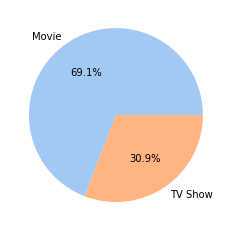

In [69]:
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(df_graph['show_id'], labels = df_graph['type'], colors = colors, autopct='%0.1f%%');

**Plotly**

In [70]:
df_graph = df['type'].value_counts().reset_index()

In [71]:
df_graph

,index,type
0,Movie,5377
1,TV Show,2400


In [73]:
fig = px.pie(df_graph, values='type', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Seaborn**

In [75]:
df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()

,rating,target_ages,show_id
0,G,Kids,39
1,G,Older Kids,0
2,G,Teens,0
3,G,Adults,0
4,NC-17,Kids,0
5,NC-17,Older Kids,0
6,NC-17,Teens,0
7,NC-17,Adults,3
8,NR,Kids,0
9,NR,Older Kids,0


In [76]:
rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
rating_df = rating_df[rating_df['show_id'] != 0]
rating_df.columns = ['rating', 'target_ages', 'counts']
rating_df = rating_df.sort_values('target_ages')

In [77]:
rating_df

,rating,target_ages,counts
0,G,Kids,39
28,TV-G,Kids,197
40,TV-Y,Kids,279
13,PG,Older Kids,247
37,TV-PG,Older Kids,804
45,TV-Y7,Older Kids,270
49,TV-Y7-FV,Older Kids,6
18,PG-13,Teens,387
26,TV-14,Teens,1931
7,NC-17,Adults,3


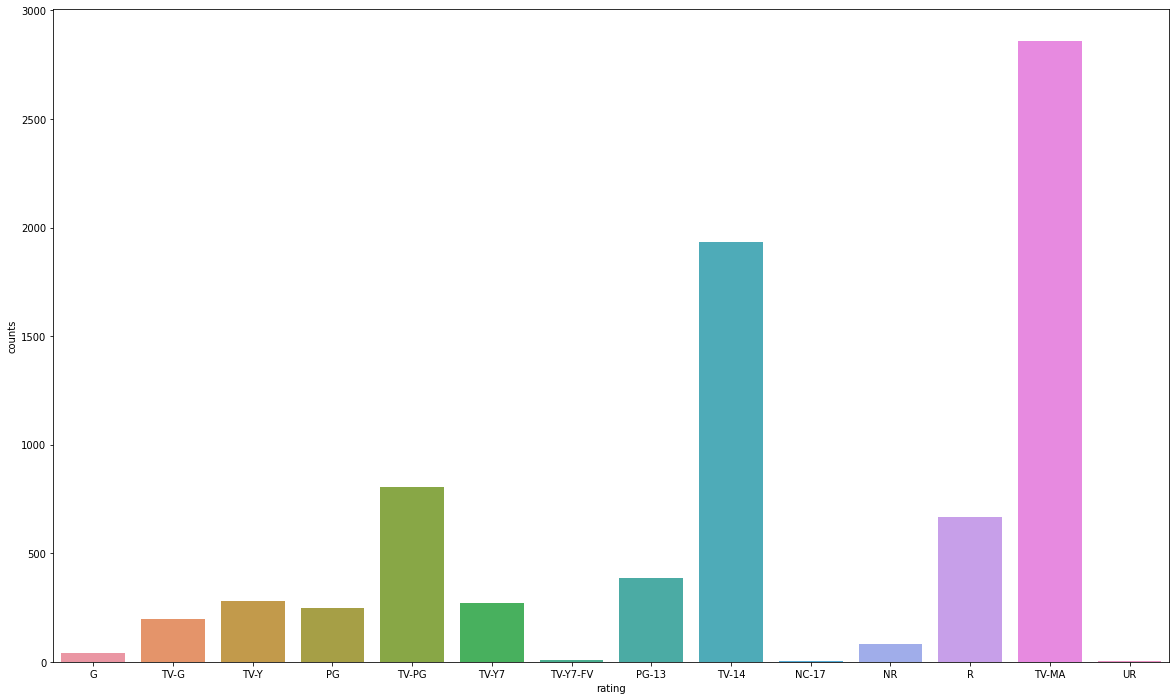

In [78]:
plt.figure(figsize=(20,12))
sns.barplot(x="rating", y="counts", data=rating_df);

**Plotly**

In [80]:
def generate_rating_df(df):
    function_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    function_df = function_df[function_df['show_id'] != 0]
    function_df.columns = ['rating', 'target_ages', 'counts']
    function_df = function_df.sort_values('target_ages')
    return function_df

In [81]:
rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='rating', y='counts')
fig.show()

**Seaborn**

In [ ]:
target_tv = df.loc[df['type']=='TV Show'].groupby(['target_ages']).agg({'show_id': 'count'}).reset_index()
target_movie = df.loc[df['type']=='Movie'].groupby(['target_ages']).agg({'show_id': 'count'}).reset_index()

In [ ]:
target_movie

In [ ]:
# Definimos subplots utilizando fig.add_subplot(fila, columna, posición).
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)

ax.pie(target_tv['show_id'],labels = target_tv['target_ages'], colors = colors, autopct='%0.2f%%')

ax = fig.add_subplot(122)
ax.pie(target_movie['show_id'],labels = target_movie['target_ages'], colors = colors, autopct='%0.2f%%');


**Plotly**

In [ ]:
movie_rating_df = generate_rating_df(movie_df)
show_rating_df = generate_rating_df(show_df)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Rating distribution by Type of content",
    # Anotaciones en el centro de las dunuts
    annotations=[dict(text='Movies', x=0.16, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()

**Seaborn**

In [ ]:
country_df = df['principal_country'].value_counts().reset_index()
country_df = country_df.loc[country_df['principal_country'] /  country_df['principal_country'].sum() > 0.01]

plt.figure(figsize=(14,14))

colors = sns.color_palette('pastel')

plt.pie(country_df['principal_country'], labels = country_df['index'], colors = colors, autopct='%0.2f%%');

**Plotly**

In [ ]:
country_df = df['principal_country'].value_counts().reset_index()
country_df = country_df[country_df['principal_country'] /  country_df['principal_country'].sum() > 0.01]

fig = px.pie(country_df, values='principal_country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Seaborn**

In [ ]:
plt.figure(figsize=(20,6))
sns.histplot(data=df, x='principal_country')
plt.xticks(rotation=50);

**Plotly**

In [ ]:
fig = px.histogram(df, x='principal_country')
fig.update_xaxes(categoryorder='total descending')
fig.show()

# Fechas


**Seaborn**

In [ ]:
# Generamos dos datasets. Unos para 'released' y otro para 'added'
released_year_df = df.loc[df['release_year'] > 2010].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df = df.loc[df['year_added'] > 2010].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

# A cada dataset le generamos una variable, para indicar tipo y df
released_year_df['type'] = released_year_df['type'].astype(str)
released_year_df['type'] = 'released_' + released_year_df['type']

added_year_df['type'] = added_year_df['type'].astype(str)
added_year_df['type'] = 'added_' + added_year_df['type']

added_year_df.rename(columns = {'year_added': 'year'}, 
                inplace = True)
released_year_df.rename(columns = {'release_year': 'year'}, 
                inplace = True)

df_graph = released_year_df.append(added_year_df)
df_graph.sort_values('year', inplace = True)


In [ ]:
df_graph = df_graph.reset_index(drop=True)

In [ ]:
fig = plt.figure(figsize=(14,6))
sns.lineplot(x = "year",
             y = "show_id",
             hue = "type",
             data = df_graph);

In [ ]:
released_year_df = df.loc[df['release_year'] > 2010].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df = df.loc[df['year_added'] > 2010].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

**Seaborn**

In [ ]:
sns.displot(data=df.loc[df['release_year'] > 2000], x = 'release_year',kde=True);

# sns.displot(data=df.loc[df['release_year'] > 2000], x = 'release_year', hue = 'target_ages',kde=True);


In [ ]:
from scipy.stats import norm

sns.distplot(df.loc[df['release_year'] > 2000, 'release_year'], fit=norm, kde=False);

# Generos

### Construimos un `dataframe` con los tipos de contenido

In [ ]:
df['genre'].unique

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer 

In [ ]:
mlb = MultiLabelBinarizer()
genres_df = pd.DataFrame(mlb.fit_transform(df['genre']), columns=mlb.classes_, index=df['genre'].index)
genres_df

In [ ]:
tdata = genres_df.sum()
tdata.info()    

In [ ]:
tdata = genres_df.sum().sort_values(ascending=False)
    
fig = go.Figure()
fig.add_trace(go.Bar(
    x=tdata.index,
    y=tdata.values,
))
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(title='Categorias')
fig.show()

In [ ]:
top_movies_genres = genres_df.sum().sort_values(ascending = False).head(10).index

In [ ]:
top_movies_genres

In [ ]:
# Generamos la matriz de correlaciones con el método corr()
plt.figure(figsize=(20,12))
corr = genres_df[top_movies_genres].corr()

# Generamos el heatmap basado en las correlaciones
sns.heatmap(corr)

In [ ]:

movie_corr = genres_df[top_movies_genres].corr()
movie_mask = np.zeros_like(movie_corr, dtype=np.bool)
movie_mask[np.triu_indices_from(movie_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(movie_corr, mask=movie_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

## Word cloud

In [ ]:
# !pip install wordcloud

In [ ]:
from wordcloud import WordCloud

text = str(list(movie_df['genre'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Analisis de Duracion

### Series

Este valor está en términos de temporadas.

La mayoría son sólo de **1 temporada**

**Seaborn**

In [ ]:
plt.figure(figsize=(20,6))
sns.histplot(
             data=show_df, 
             x='duration'
            );

**Plotly**

In [ ]:
fig = px.histogram(x=show_df['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of shows duration",
    xaxis_title="Duration of the Show",
)
fig.show()

### Películas

Vamos a dividir los datos en rangos (_bins_):
- Menos de 1.30h
- Mas de 1.30h y menos de 2.30h
- Menos de 2.30h


**Alternativa 1**

In [ ]:
def duration_movie(x):
    return int(x.split(' ')[0])

In [ ]:
movie_df['temp_duration'] = movie_df['duration'].apply(duration_movie)

**Alternativa 2**

In [ ]:
temp_duration = movie_df['duration'].apply(lambda x: int(x.split(' ')[0]))

**Intervalos**

In [ ]:
movie_df.loc[movie_df['temp_duration']<90, 'duration_bin'] = 'Menos de 1.30h'
movie_df.loc[(movie_df['temp_duration'] >= 90) & (movie_df['temp_duration'] < 150) , 'duration_bin'] = 'Entre 1.30h y 2.30h'
movie_df.loc[movie_df['temp_duration'] >= 150, 'duration_bin'] = 'Mas de 2.30h'

In [ ]:
movie_df.head()

**Seaborn**

In [ ]:
plt.figure(figsize=(20,6))
sns.histplot(data=movie_df, x='duration_bin')


In [ ]:
plt.figure(figsize=(20,6))
sns.histplot(data=movie_df, 
             x='temp_duration',
             color = 'navy',
             bins = 50,
             alpha = 0.2)


**Plotly**

In [ ]:
fig = px.histogram(x=movie_df['duration_bin'], color=movie_df['duration_bin'])
fig.update_layout(
    title='Distribución según duración',
    xaxis_title='Duración de las películas',
    yaxis_title='Cantidad'
)
fig.show()